### Practice 3

In [168]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [169]:
df = pd.read_csv('./Data_Prep.csv', index_col=0)

In [170]:
print(df.shape)

(200000, 22)


In [171]:
df = df.drop(['iduser', 'mdutype', 'group'], axis = 1)

#### DataFrame 확인

In [172]:
df.info() # 컬럼별 타입 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 19 columns):
viewCount        165369 non-null float64
editCount        165369 non-null float64
shareCount       165369 non-null float64
searchCount      165369 non-null float64
coworkCount      165369 non-null float64
add              63166 non-null float64
del              63166 non-null float64
move             63166 non-null float64
rename           63166 non-null float64
adddir           63166 non-null float64
movedir          63166 non-null float64
visdays          184305 non-null float64
openCount        149090 non-null float64
saveCount        149090 non-null float64
exportCount      149090 non-null float64
viewTraffic      149090 non-null float64
editTraffic      149090 non-null float64
exportTraffic    149090 non-null float64
traffic          149090 non-null float64
dtypes: float64(19)
memory usage: 30.5 MB


In [173]:
df.isnull().sum() # column별 missing value 확인

viewCount         34631
editCount         34631
shareCount        34631
searchCount       34631
coworkCount       34631
add              136834
del              136834
move             136834
rename           136834
adddir           136834
movedir          136834
visdays           15695
openCount         50910
saveCount         50910
exportCount       50910
viewTraffic       50910
editTraffic       50910
exportTraffic     50910
traffic           50910
dtype: int64

#### (1) missing value 처리: missing value가 하나라도 있으면 제거

In [186]:
# df.dropna(how='any')
d = df.dropna(how='any')

In [188]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54722 entries, 1 to 199998
Data columns (total 19 columns):
viewCount        54722 non-null float64
editCount        54722 non-null float64
shareCount       54722 non-null float64
searchCount      54722 non-null float64
coworkCount      54722 non-null float64
add              54722 non-null float64
del              54722 non-null float64
move             54722 non-null float64
rename           54722 non-null float64
adddir           54722 non-null float64
movedir          54722 non-null float64
visdays          54722 non-null float64
openCount        54722 non-null float64
saveCount        54722 non-null float64
exportCount      54722 non-null float64
viewTraffic      54722 non-null float64
editTraffic      54722 non-null float64
exportTraffic    54722 non-null float64
traffic          54722 non-null float64
dtypes: float64(19)
memory usage: 8.3 MB


In [175]:
d.head()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
1,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,17123098.0,0.0,0.0,17123098.0
5,33.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,18.0,33.0,0.0,0.0,4307703.0,0.0,0.0,4307703.0
6,25.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,10.0,25.0,0.0,0.0,31817616.0,0.0,0.0,31817616.0
11,18.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,18.0,0.0,0.0,20468009.0,0.0,0.0,20468009.0
20,27.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,11.0,27.0,0.0,0.0,16293132.0,0.0,0.0,16293132.0


#### (2) Outlier 분석 및 제거

In [191]:
cols = d.columns
cols, len(cols)

(Index(['viewCount', 'editCount', 'shareCount', 'searchCount', 'coworkCount',
        'add', 'del', 'move', 'rename', 'adddir', 'movedir', 'visdays',
        'openCount', 'saveCount', 'exportCount', 'viewTraffic', 'editTraffic',
        'exportTraffic', 'traffic'],
       dtype='object'), 19)

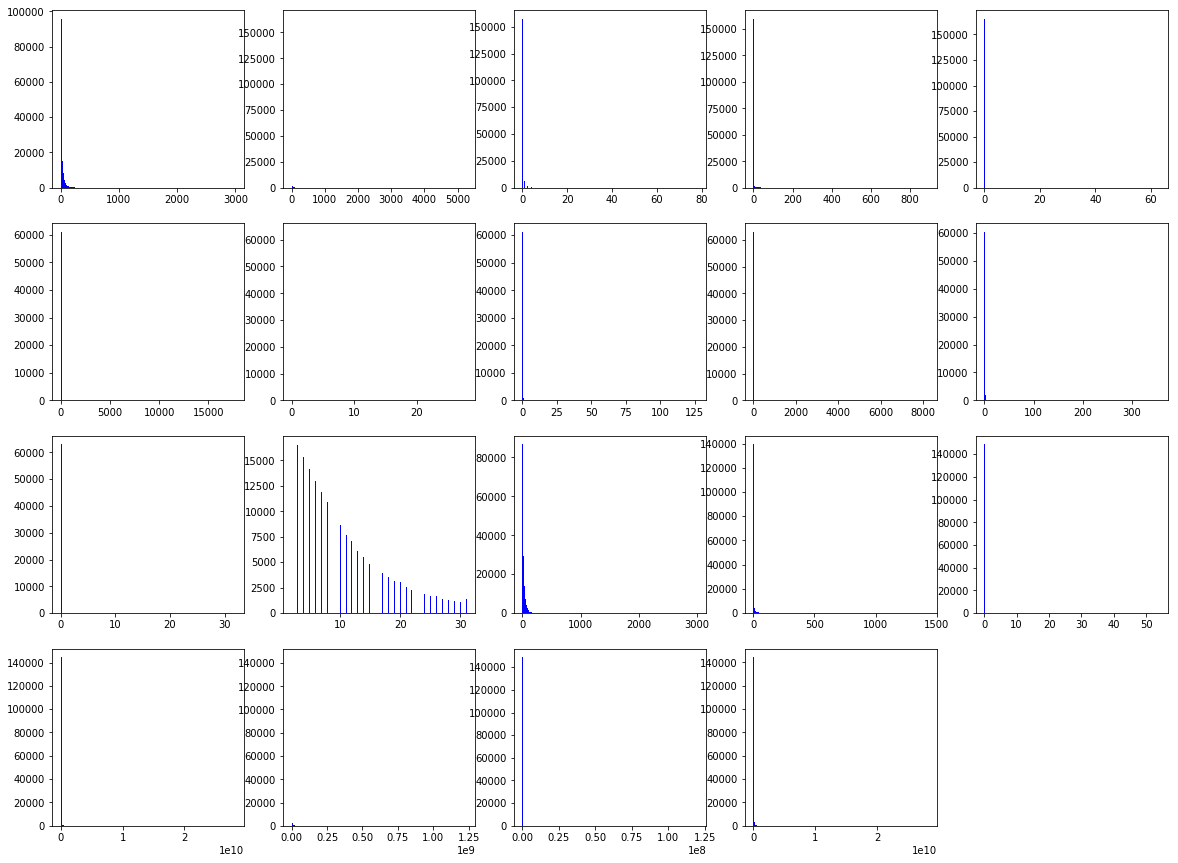

In [177]:
fig = plt.figure(figsize=(20,15))
for i in range(0, 19):
    fig.add_subplot(4, 5, i+1)
    plt.hist(df[cols[i]], bins=200, color='blue');    

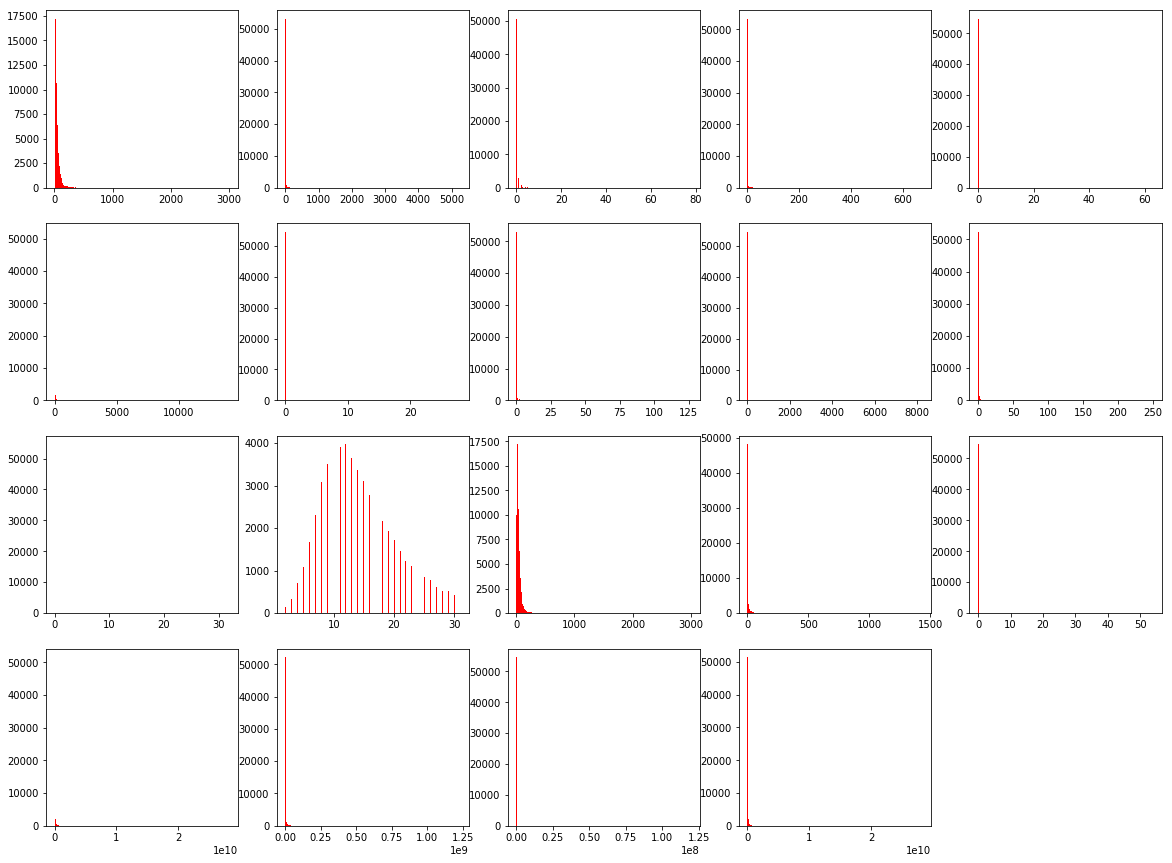

In [178]:
fig = plt.figure(figsize=(20,15))
for i in range(0, 19):
    fig.add_subplot(4, 5, i+1)
    plt.hist(d[cols[i]], bins=200, color='red');   

In [179]:
# fig = plt.figure(figsize=(20,15))
# for i in range(1, 20):
#     fig.add_subplot(4, 5, i)
#     sns.distplot(df[cols[i+2]], bins=200, color='blue')
#     sns.distplot(d[cols[i+2]], bins=200, color='red')

#### Outliner

In [180]:
def std_based_outlier(df): # 강의자료에 있음, p24
    for i in range(0, len(df.iloc[1])):
        df = df[~(np.abs(df.iloc[:,i]-df.iloc[:,i].mean()) > (3*df.iloc[:,i].std()))]
        return df
    
#     s = set()
#     for colname in df.columns:
#         outlier = np.abs(df[colname][df[colname].notnull()]-df[collname][])
#         s.update(outlier[outlier==True].index.tolist())
#     df = df.iloc[list(set(range(len(df))).difference(s))]
#     return df
        
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr*1.5)
    upper_bound = quartile_3 + (iqr*1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [181]:
ds = std_based_outlier(d)

In [194]:
cols[0]

'viewCount'

#### outlier 제거 전

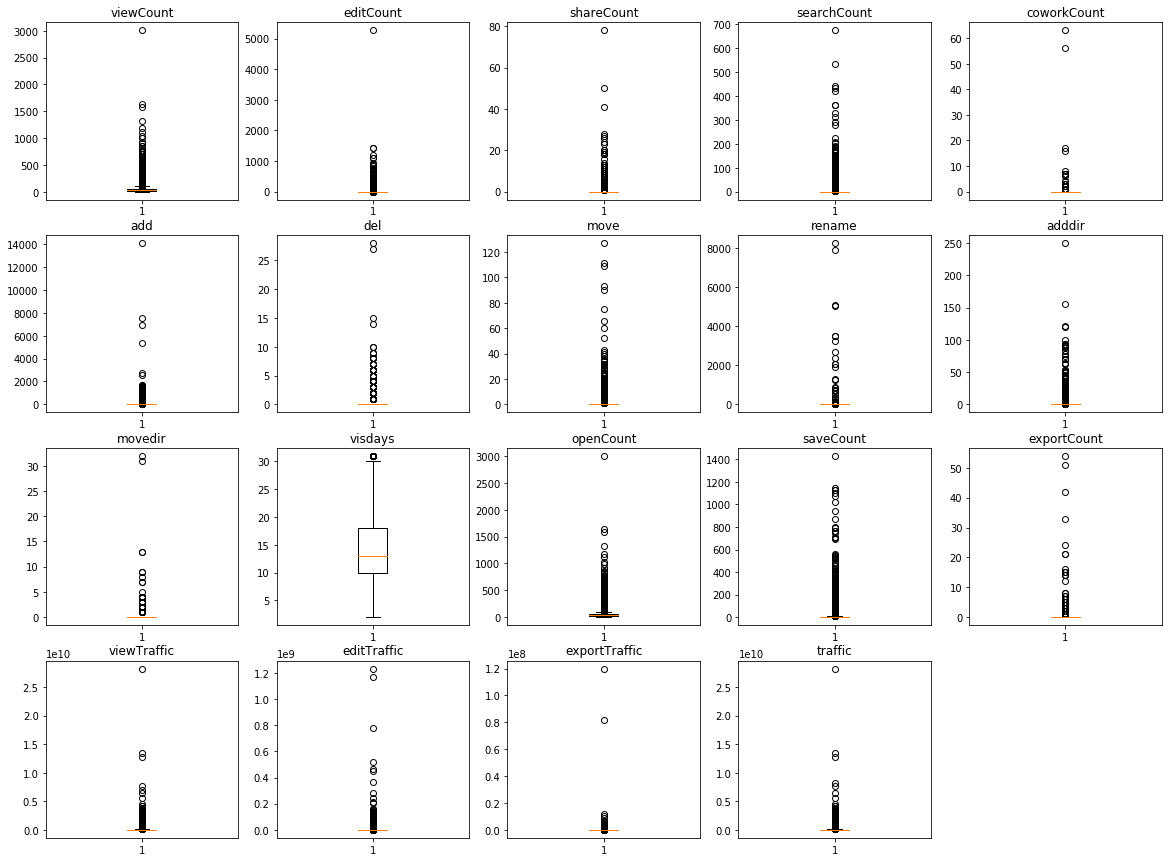

In [204]:
fig = plt.figure(figsize=(20,15))
for i in range(0, 19):
    fig.add_subplot(4, 5, i+1)
    plt.boxplot(d[cols[i]]) 
    plt.title(cols[i])

#### standard 방법으로 outlier 제거

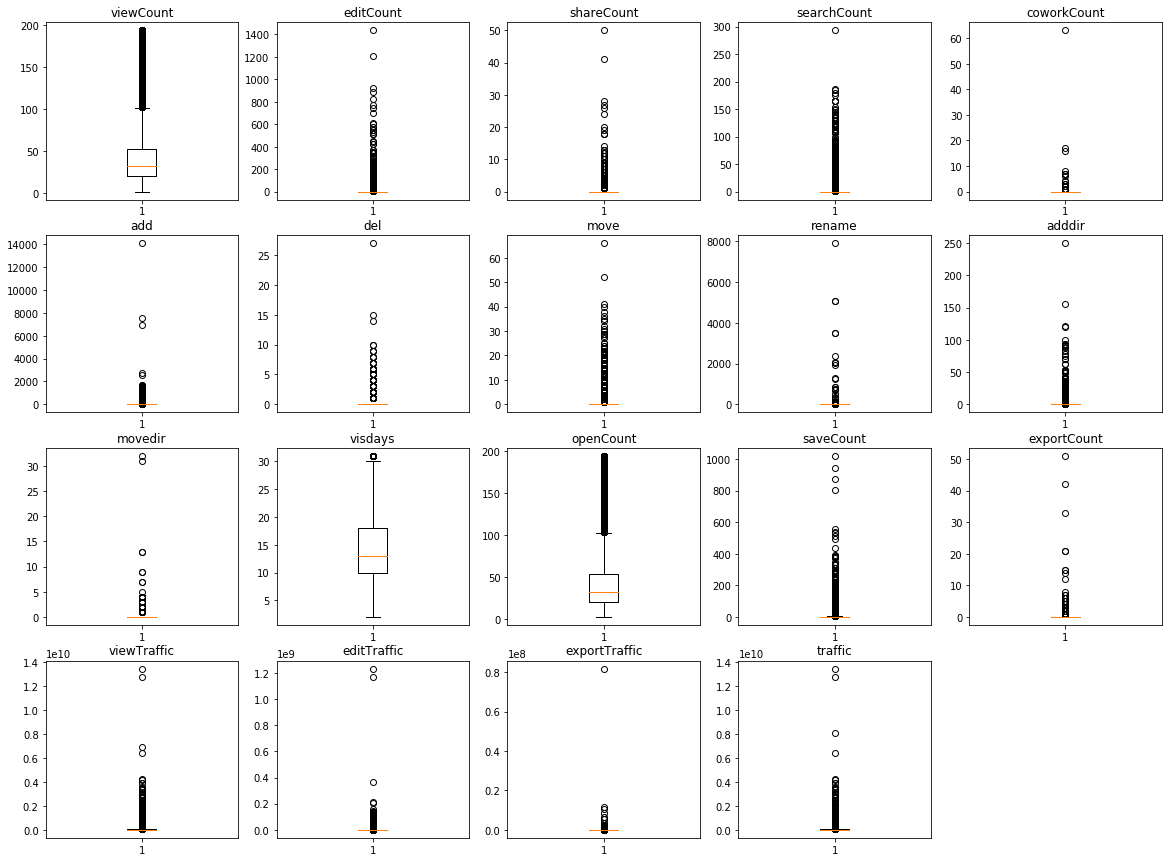

In [205]:
fig = plt.figure(figsize=(20,15))
for i in range(0, 19):
    fig.add_subplot(4, 5, i+1)
    plt.boxplot(ds[cols[i]])
    plt.title(cols[i])

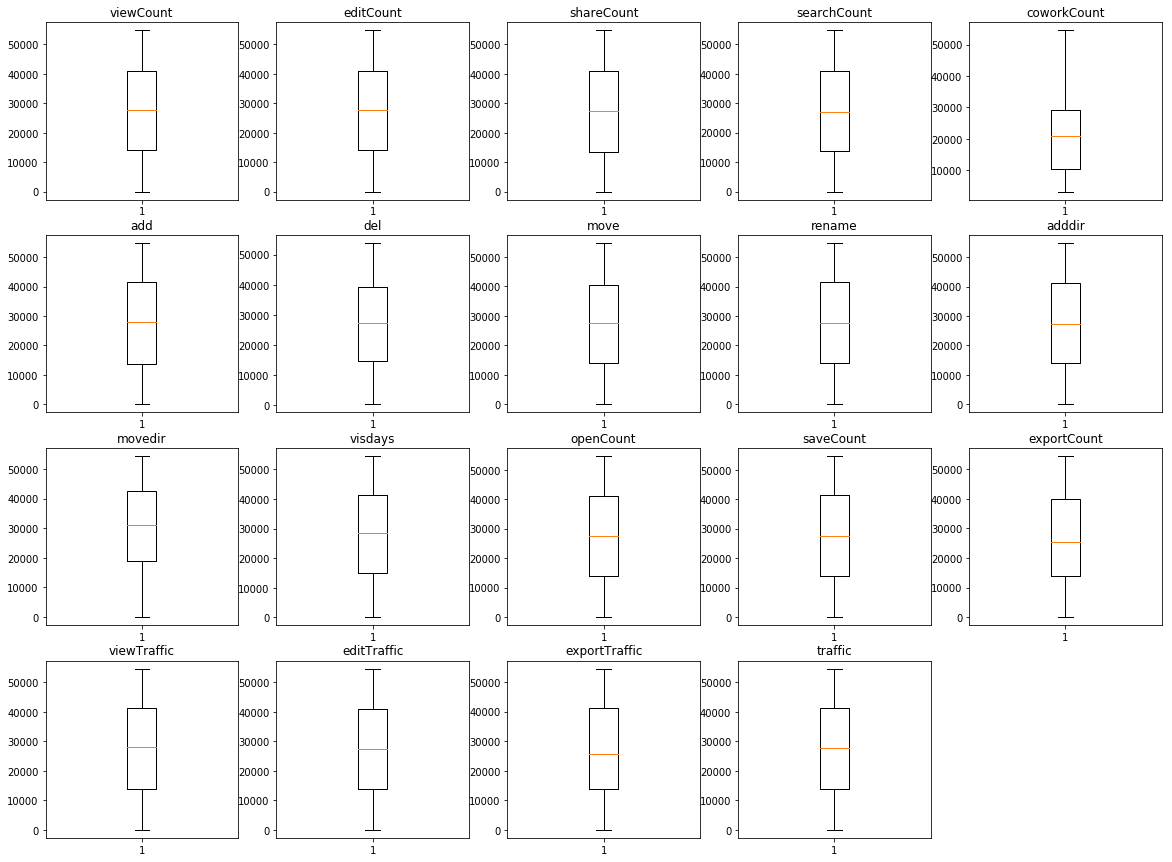

In [207]:
fig = plt.figure(figsize=(20,15))
for i in range(0, 19):
    fig.add_subplot(4, 5, i+1)
    plt.boxplot(outliers_iqr(d[cols[i]]))
    plt.title(cols[i])

In [ ]:
# df.describe

In [ ]:
# df.notnull()

In [ ]:
# df[df.notnull()]

In [ ]:
df_ = df.drop(['iduser', 'mdutype', 'group'], axis = 1)

In [ ]:
df_

In [ ]:
scaler = [preprocessing.StandardScaler() for i in df_.columns]

In [ ]:
_, axes = plot.subplots(19, 1, figsize=(5,50))
for i, ax in enumerate(axes):
    

In [ ]:
df = std_base_outlier(df_)
df